In [182]:
import numpy as np
import pygmt
import xarray as xr

In [183]:
with open('real_input.txt', 'r') as fh:
    lines = fh.readlines()

## Parse input

In [184]:
x = 1
x_history = [x]
for line in lines:
    if line.startswith('addx'):
        (_, value) = line.split()
        x_history.append(x)
        x += int(value)
        x_history.append(x)
    else: # noop
        x_history.append(x)

# Part 1: Compute signal strength

In [185]:
answer = 0
timing = range(20, 221, 40)
for time in timing:
    signal = time * x_history[time-1]
    answer += time * x_history[time-1]
    print(time, signal, answer)

20 420 420
60 1260 1680
100 2100 3780
140 2940 6720
180 2880 9600
220 4620 14220


## Part 2: Racing the beam

In [187]:
output_signal = np.zeros(len(x_history)-1)
for cycle in range(1, len(x_history)):
    for x_sprite in [cycle-1, cycle, cycle+1]:
        if x_sprite%40 == x_history[cycle]:
            output_signal[cycle] = 1

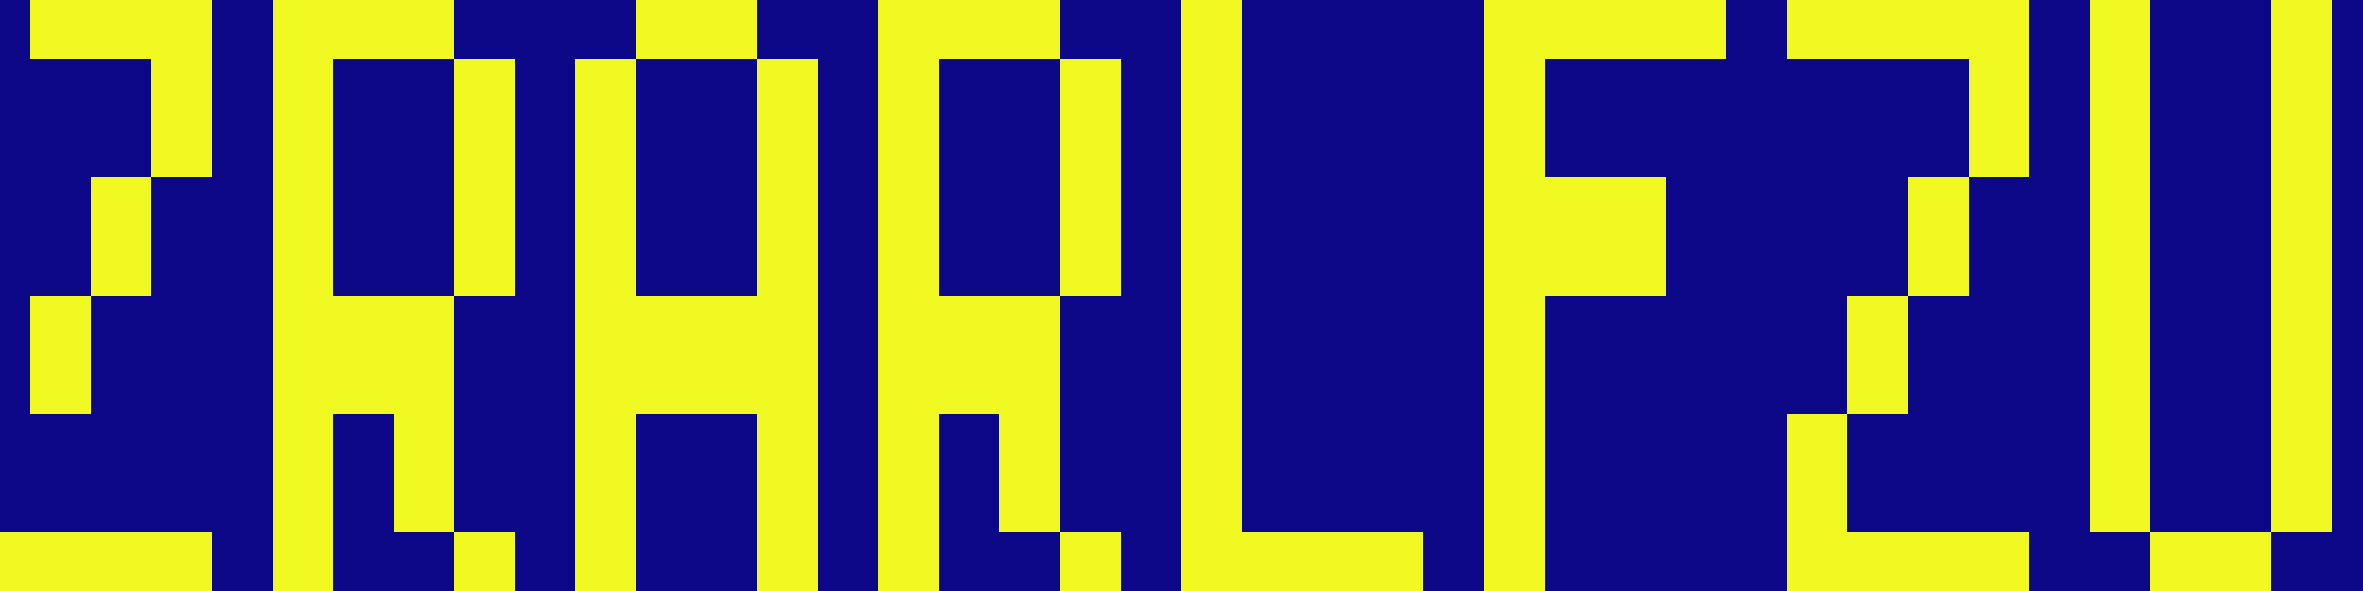

In [188]:
fig = pygmt.Figure()
fig.grdimage(xr.DataArray(output_signal.reshape(6,40))[::-1,:], projection='X20c/5c', cmap='plasma')
fig.show(width=1000)

In [ ]:
ZRARLFZU